# 2012年每天的单车共享数量

Capital Bikeshare （美国 Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。训练数据为 2011 年的数据，要求预测 2012 年每天的单车共享数量。

## 导入必要的工具包

In [203]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()
plt.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False          # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

## 读取数据

In [204]:
# path to where the data lies
#dpath = './data/'
data = pd.read_csv("day.csv")
data.head()
#data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 数据基本信息

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [206]:
### 查看是否有空值
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 探索数据

查看数据各特征的分布，以及特征之间是否存在相关关系等冗余。

我们可以借用可视化工具来直观感觉数据的分布。

在Python中，有很多数据可视化途径。
Matplotlib非常强大，也很复杂，不易于学习。 
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

In [207]:
## 各属性的统计特性
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


此处得到各属性的样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值
可初步了解各特征的分布

### 单变量分布分析

In [208]:
data=data.drop('instant', axis = 1) #删掉无关特征
data_2011 = data[data.yr < 1]       #获得训练集
data_2012 = data[data.yr == 1]      #获得测试集

data_2011=data_2011.drop('yr', axis = 1) #删掉无关特征
data_2012=data_2012.drop('yr', axis = 1) #删掉无关特征

data_2011=data_2011.drop('dteday', axis = 1) #删掉无关特征
data_2012=data_2012.drop('dteday', axis = 1) #删掉无关特征
data_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 13 columns):
season        365 non-null int64
mnth          365 non-null int64
holiday       365 non-null int64
weekday       365 non-null int64
workingday    365 non-null int64
weathersit    365 non-null int64
temp          365 non-null float64
atemp         365 non-null float64
hum           365 non-null float64
windspeed     365 non-null float64
casual        365 non-null int64
registered    365 non-null int64
cnt           365 non-null int64
dtypes: float64(4), int64(9)
memory usage: 39.9 KB


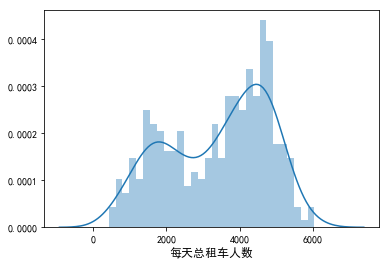

In [209]:
# 目标y（总租车人数）的直方图／分布
fig = plt.figure()
sns.distplot(data_2011.cnt.values, bins=30, kde=True)
plt.xlabel('每天总租车人数', fontsize=12)
plt.show()

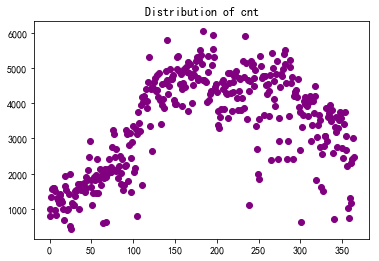

In [210]:
# 单个特征散点图
plt.scatter(range(data_2011.shape[0]), data_2011["cnt"].values,color='purple')
plt.title("Distribution of cnt");

可以看出，数据大多集中在均值（22.5）附近，和正态分布比较接近。但最大值50的样本数目偏多，可能是原始数据将所有大于50的样本的值都设置为50（猜测），在模型训练时也可以考虑将y等于50的样本当成outliers（离群点）去掉。

In [211]:
data_2011.shape

(365, 13)

## 输入属性的直方图／分布

天气情况的分布，1 晴天 2 雾天 3 小雨小雪 4 大雨大雪大雾

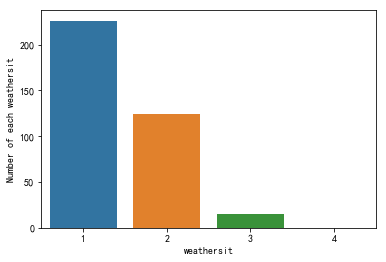

In [212]:
sns.countplot(data_2011.weathersit, order=[1,2,3,4]);
plt.xlabel('weathersit');
plt.ylabel('Number of each weathersit');

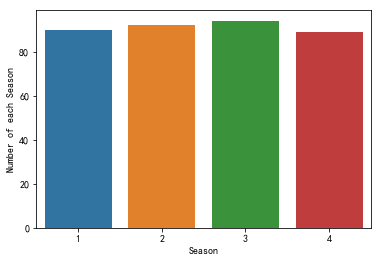

In [213]:
sns.countplot(data_2011.season, order=[1,2,3,4]);
plt.xlabel('Season');
plt.ylabel('Number of each Season');

## 两两特征之间的相关性

In [214]:
#data_2011=data_2011.drop('weathersit', axis = 1) #删掉无关特征
#data_2012=data_2012.drop('weathersit', axis = 1) #删掉无关特征
#get the names of all the columns
cols=data_2011.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data_2011.corr().abs()

In [215]:
data_corr.shape

(13, 13)

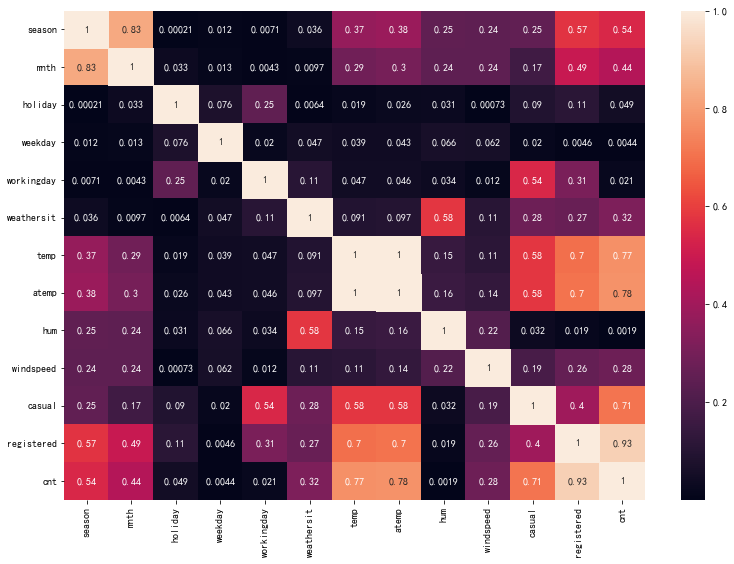

In [216]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('Capital_Bikeshare.png' )
plt.show()

In [217]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

temp and atemp = 1.00
registered and cnt = 0.93
season and mnth = 0.83
atemp and cnt = 0.78
temp and cnt = 0.77
casual and cnt = 0.71
atemp and registered = 0.70
temp and registered = 0.70
weathersit and hum = 0.58
atemp and casual = 0.58
temp and casual = 0.58
season and registered = 0.57
season and cnt = 0.54
workingday and casual = 0.54


weathersit and temp 这俩个特征强相关，去掉weathersit特征

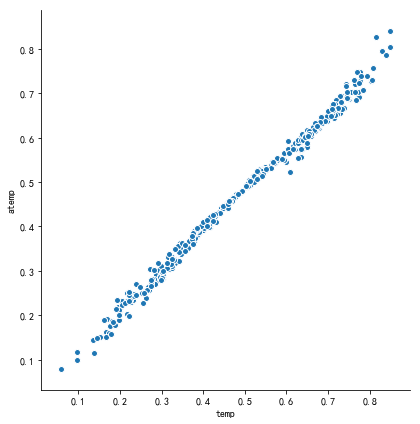

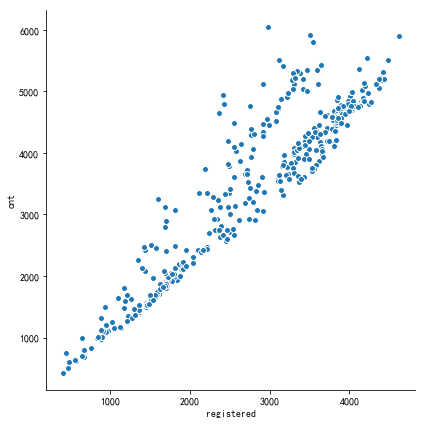

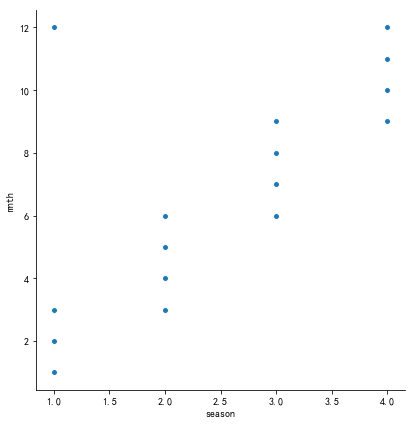

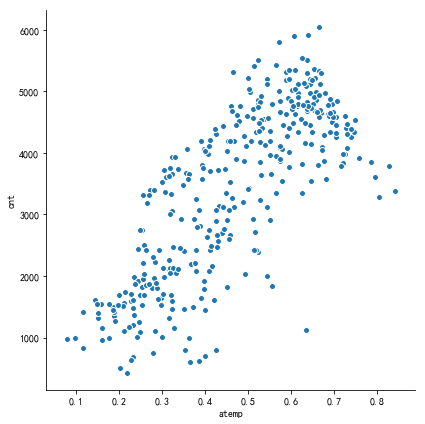

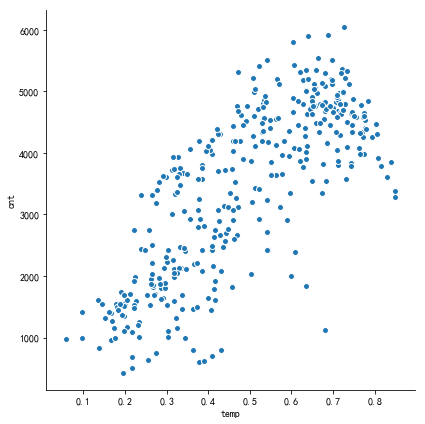

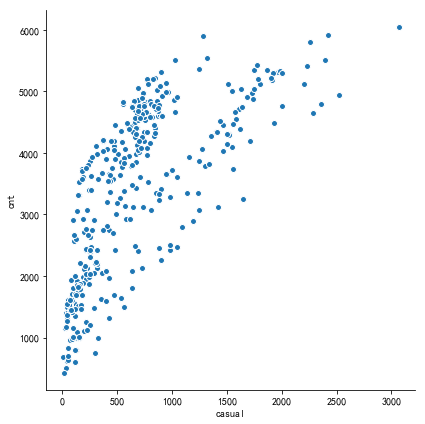

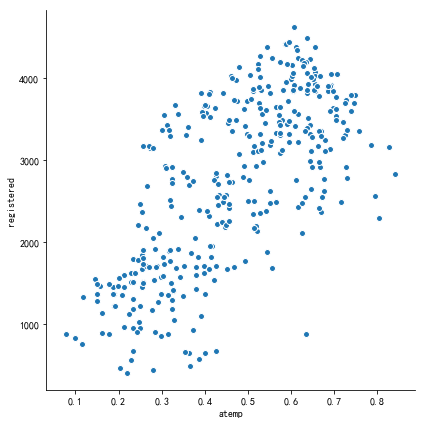

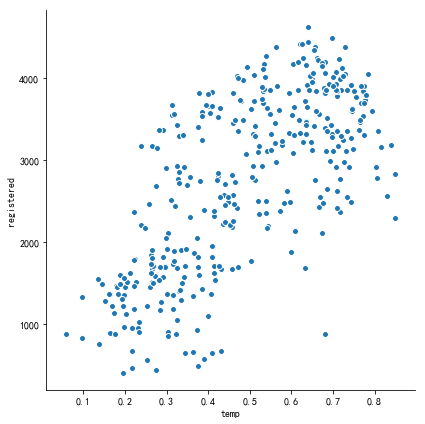

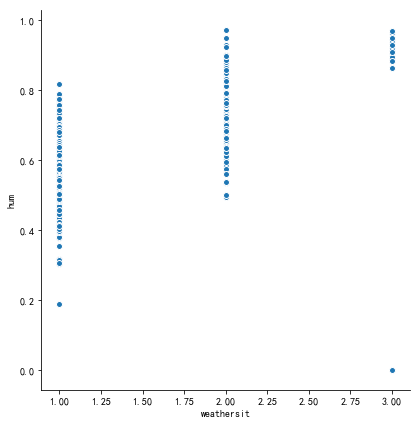

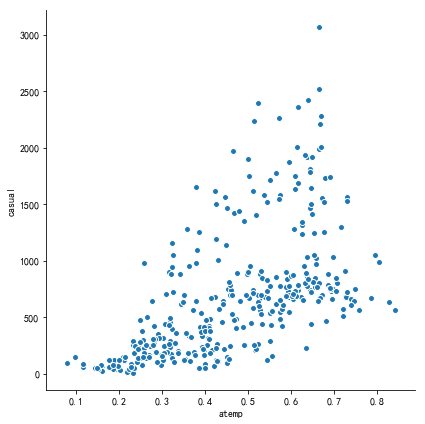

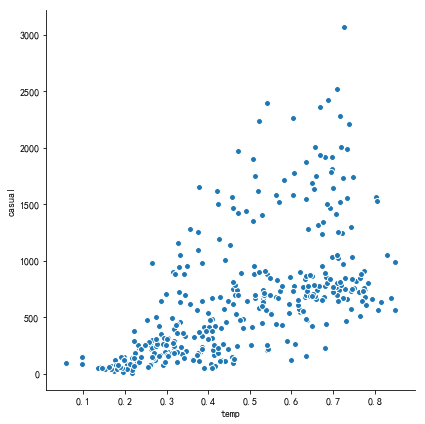

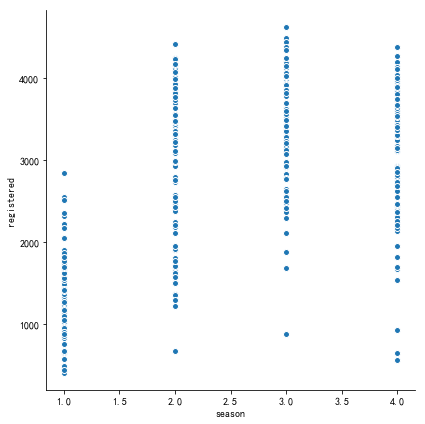

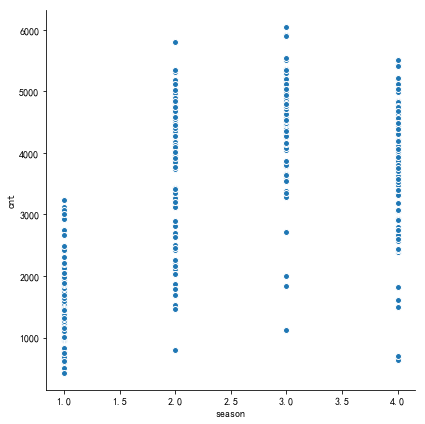

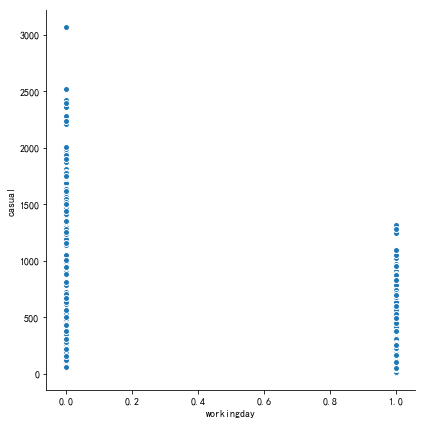

In [218]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(data_2011, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()